# FordGoBike Data Exploration
## by Fahad Bakoor
# Introduction
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay, and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

the data set I'm using today is for February 2019, which covers info about trips taken by service members, their types, their age, their gender, stations of starting and ending trips, duration of trips, etc.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

## Cleaning

In [10]:
#making a copy for cleaning 
clean_df = df.copy()

In [11]:
#Change date columns to datetime
clean_df.start_time = pd.to_datetime(clean_df.start_time)
clean_df.end_time = pd.to_datetime(clean_df.end_time)

#Change id coulumns to string 
clean_df.start_station_id = clean_df.start_station_id.astype(str)
clean_df.end_station_id = clean_df.end_station_id.astype(str)
clean_df.bike_id = clean_df.bike_id.astype(str)

#change gender and type, bike_share_for_all_trip to category 
clean_df.user_type = clean_df.user_type.astype('category')
clean_df.member_gender = clean_df.member_gender.astype('category')
clean_df.bike_share_for_all_trip = clean_df.bike_share_for_all_trip.astype('category')

#Test
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [12]:
#add a column for age of member 
clean_df['member_age'] = 2019 - clean_df.member_birth_year
clean_df['member_age'].fillna(0)
clean_df['member_age'] = clean_df['member_age'].astype(int,errors='ignore')

In [13]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [14]:
#test
clean_df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000


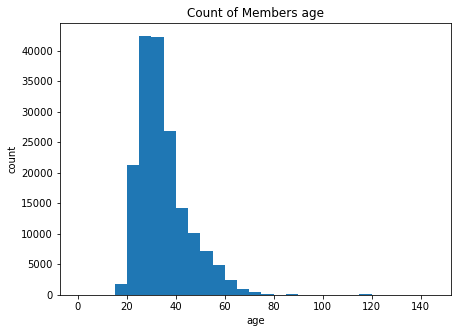

In [15]:
#Examining Age outliers 
plt.figure(figsize=[7, 5])
bins = np.arange(0, clean_df.member_age.max()+5, 5)
plt.hist(clean_df.member_age, bins=bins)
plt.title("Count of Members age")
plt.xlabel('age')
plt.ylabel("count");

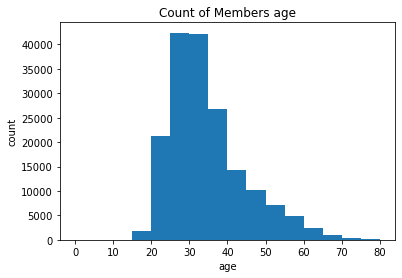

In [16]:
#droping rows with unrealistic age
clean_df = clean_df.query("member_age < 80")
#test
plt.figure(figsize=[6, 4])
bins = np.arange(0, clean_df.member_age.max()+5, 5)
plt.hist(clean_df.member_age, bins=bins)
plt.title("Count of Members age")
plt.xlabel('age')
plt.ylabel("count");

In [17]:
#extract day of week and hour from start_time
clean_df['start_DayofWeek'] = clean_df.start_time.dt.strftime('%a')
clean_df['start_hour'] = clean_df.start_time.dt.hour

In [18]:
# Convert start_DayofWeek to ordinal
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
clean_df.start_DayofWeek = clean_df.start_DayofWeek.astype(ordered_days)

In [19]:
clean_df.start_DayofWeek.value_counts()

Thu    33710
Tue    30590
Wed    28426
Fri    27638
Mon    25633
Sun    14512
Sat    14435
Name: start_DayofWeek, dtype: int64

In [20]:
#convert duration to minutes 
clean_df['duration_min'] = clean_df.duration_sec/60

In [21]:
#drop nulls 
clean_df.dropna(inplace=True)
#test
clean_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
start_DayofWeek            0
start_hour                 0
duration_min               0
dtype: int64

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174749 non-null  int64         
 1   start_time               174749 non-null  datetime64[ns]
 2   end_time                 174749 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  object        
 4   start_station_name       174749 non-null  object        
 5   start_station_latitude   174749 non-null  float64       
 6   start_station_longitude  174749 non-null  float64       
 7   end_station_id           174749 non-null  object        
 8   end_station_name         174749 non-null  object        
 9   end_station_latitude     174749 non-null  float64       
 10  end_station_longitude    174749 non-null  float64       
 11  bike_id                  174749 non-null  object        
 12  user_type       

In [23]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_DayofWeek,start_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,Thu,17,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,Thu,12,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,Thu,17,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,Thu,23,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,Thu,23,29.883333


### What is the structure of your dataset?
We have 174944 Rows and 19 Columns.
The data covers three sections
- Duration data
- Station data: start/end station,longitude
- Members data: age,gender,user type
- bike data: id

### What is/are the main feature(s) of interest in your dataset?
The duration of Biking, the distribution of trips over periods, finding whats the average age and the average duration, and the user's traits (age, gender,type).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
the day of the week with the most number of trips.


In [24]:
clean_df.to_csv('clean_GoBike.csv',index=False)

## Univariate Exploration

### Duration of trips

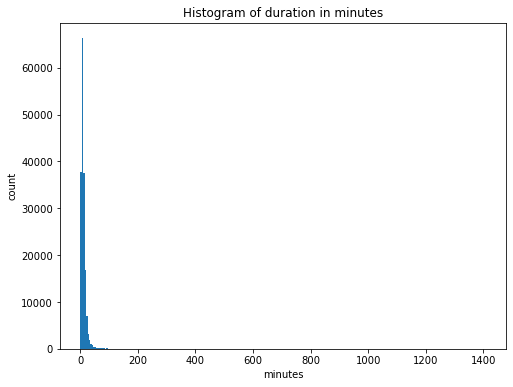

In [25]:
#Histogram of duration in minutes  
bins = np.arange(0, clean_df.duration_min.max()+5, 5)
plt.figure(figsize=[8, 6])
plt.hist(clean_df.duration_min, bins=bins)
plt.title("Histogram of duration in minutes")
plt.xlabel('minutes')
plt.ylabel("count");

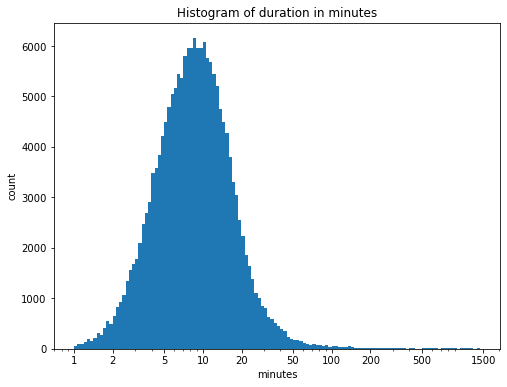

In [26]:
#Closer look at Histogram of duration in minutes  
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(clean_df.duration_min.max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 6])
plt.hist(data = clean_df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1500], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1500])
plt.title("Histogram of duration in minutes")
plt.xlabel('minutes')
plt.ylabel("count");

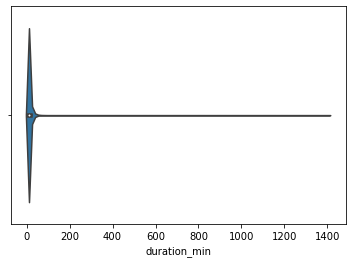

In [27]:
##violin plot of duration in minutes  
sb.violinplot(data=clean_df,x='duration_min');

In [28]:
clean_df.duration_min.describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

### Remarks 
- The data is skewed to the right 
- Most of the trips are below 15 min
- The avrage trip is 11.7 min
- The longest trip was 1409 min (23 hours 29 minutes)
- The shortest trip was 1 min 

### Age

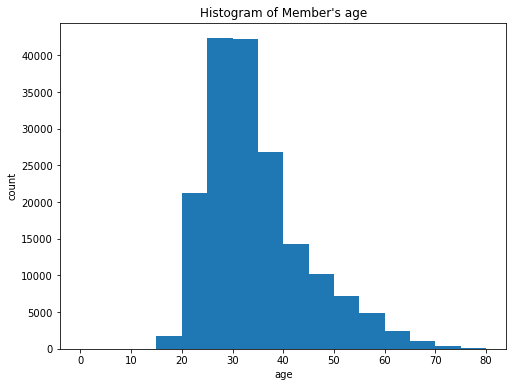

In [29]:
bins = np.arange(0, clean_df.member_age.max()+5, 5)
plt.figure(figsize=[8, 6])
plt.hist(clean_df.member_age, bins=bins)
plt.title("Histogram of Member's age")
plt.xlabel('age')
plt.ylabel("count");

In [30]:
clean_df.member_age.describe()

count    174749.000000
mean         34.122335
std           9.871342
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          78.000000
Name: member_age, dtype: float64

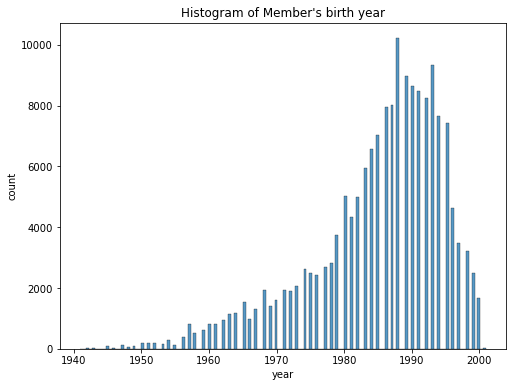

In [31]:
plt.figure(figsize=[8, 6])
sb.histplot(data=clean_df,x='member_birth_year')
plt.title("Histogram of Member's birth year")
plt.xlabel('year')
plt.ylabel("count");

In [32]:
clean_df.member_birth_year.describe()

count    174749.000000
mean       1984.877665
std           9.871342
min        1941.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Remarks
- Most of the bikers are around the age 30
- Not many bikers above the age 50
- The avrage age is 34 
- The youngest member is 18 years old and oldest is 78

### Trip Distribution over Time periods

In [33]:
blu = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 8, 6

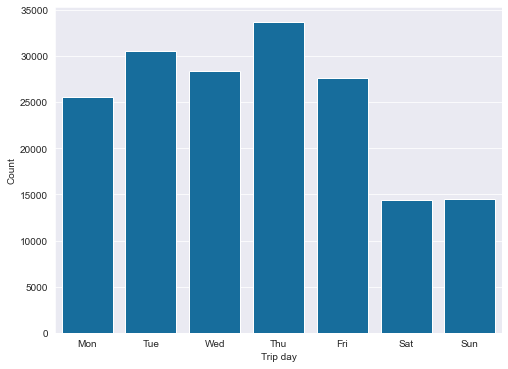

In [34]:
# trip distribution over week days
sb.countplot(data=clean_df, x='start_DayofWeek', color=blu)
plt.xlabel('Trip day');
plt.ylabel('Count');

In [35]:
clean_df.start_DayofWeek.value_counts()

Thu    33689
Tue    30558
Wed    28396
Fri    27619
Mon    25588
Sun    14492
Sat    14407
Name: start_DayofWeek, dtype: int64

### Remarks
- Saturday(14407) and sunday(14492) have the lowest count
- Thursday peaks with 33689 counts 

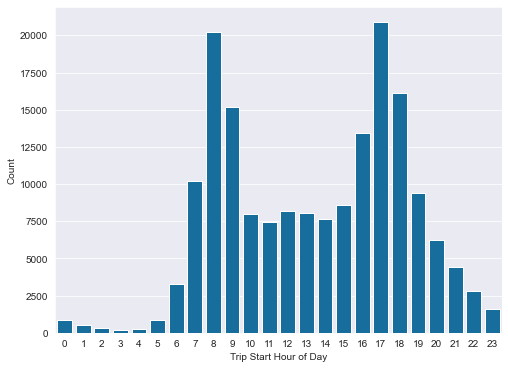

In [36]:
# trip distribution over Hour
sb.countplot(data=clean_df, x='start_hour', color=blu);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

In [37]:
clean_df.start_hour.value_counts()

17    20892
8     20218
18    16101
9     15194
16    13451
7     10226
19     9418
15     8617
12     8206
13     8072
10     7961
14     7652
11     7450
20     6210
21     4399
6      3289
22     2793
23     1572
0       892
5       866
1       525
2       354
4       227
3       164
Name: start_hour, dtype: int64

### Remarks
- The hour time distribution peaks at 5pm-6pm (20892 counts), and 8am-9am (20218 counts) 
- 3am-4am is the hours with the least counts (164)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>More male riders than females, Thursday has the most number of trips,
, most trips are short, ages are mostly between 20 and 40.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Histogram of duration in minutes, I needed a closer look to where the most records fill.

## Bivariate Exploration

In [38]:
numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude',
                'end_station_latitude', 'end_station_longitude','member_birth_year','member_age','start_hour','duration_min']
categoric_vars = ['user_type', 'member_gender', 'start_DayofWeek']

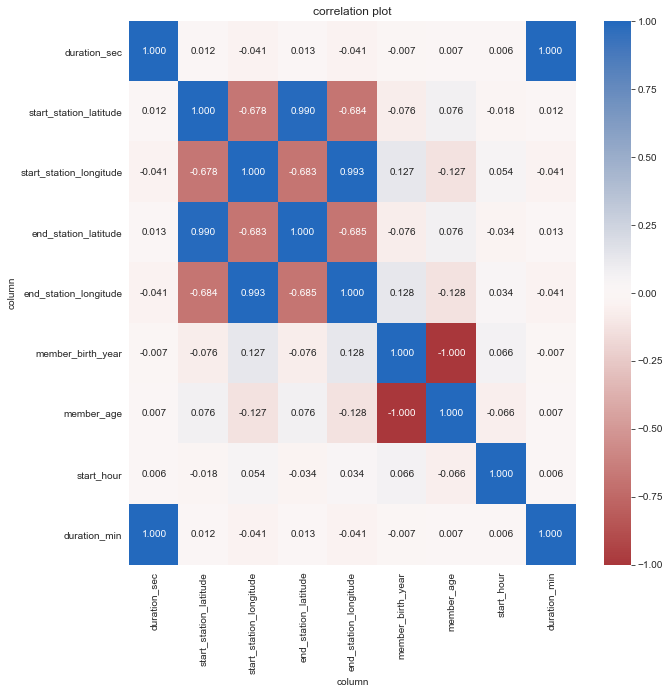

In [39]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(clean_df[numeric_vars].corr(),
           annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('correlation plot')
plt.xlabel('column');
plt.ylabel('column');

### Remarks
- Postive correlation coffiecent between :
 - start_station_latitude, start_station_longitude (0.993)
 - end_station_longitude, start_station_latitude (0.990)
- Negative correlation coffiecent between :
 - end_station_longitude, start_station_latitude (-0.684)
 - start_station_longitude, start_station_latitude (-0.678)
 - end_station_latitude, start_station_longitude (-0.683)
 - end_station_latitude, end_station_longitude (-0.685)

Generally I think this is not intersting or useful.

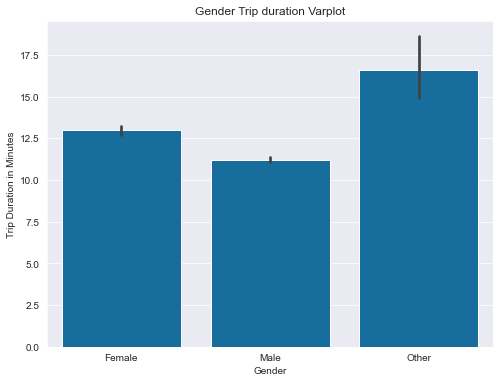

In [40]:
#Gender barplot :
sb.barplot(data=clean_df, x='member_gender', y='duration_min', color=blu);
plt.title("Gender Trip duration Varplot")
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minutes');

In [41]:
print(clean_df.query("member_gender == 'Female'").duration_min.mean())
print(clean_df.query("member_gender == 'Male'").duration_min.mean())

12.985733267917773
11.211559638893297


### Remarks
 - Female riders tend to have longer trips than Male riders 
 - average female ride is 12.98 minutes
 - average male ride is 11.21 minutes

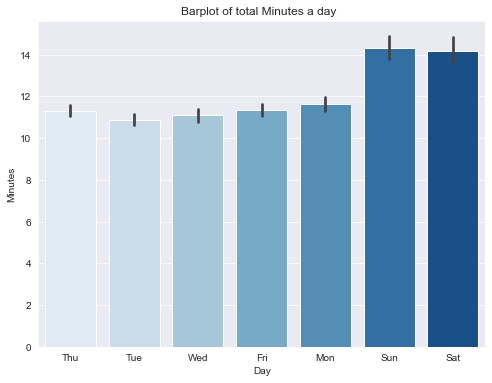

In [42]:
#Barplot of total Minutes a day
sb.barplot(data = clean_df, x = 'start_DayofWeek', y = 'duration_min', palette='Blues',order=clean_df.start_DayofWeek.value_counts().index)
plt.title("Barplot of total Minutes a day  ")
plt.ylabel('Minutes')
plt.xlabel('Day');

### Remarks 
- Sunday and Saturday have the highest duration

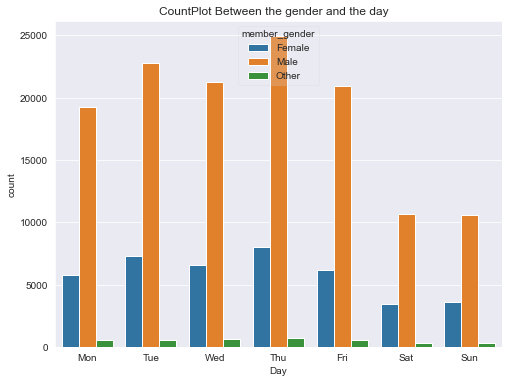

In [43]:
# Countplot Between the gender and the day 
ax = sb.countplot(data = clean_df, x = 'start_DayofWeek', hue = 'member_gender')
ax.legend(loc = 9, framealpha = 0.2, title = 'member_gender')
plt.title("CountPlot Between the gender and the day   ")
plt.ylabel('count')
plt.xlabel('Day');

### Remarks 
- there are way more male riders than Female riders on all days 

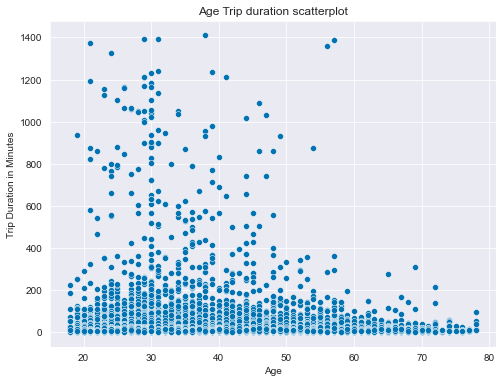

In [44]:
#Age duration scatterplot
sb.scatterplot(data=clean_df, x='member_age', y='duration_min', color=blu);
plt.title("Age Trip duration scatterplot")
plt.xlabel('Age');
plt.ylabel('Trip Duration in Minutes');

### Remarks 
- Young riders (18 to 50) tend to have longer trips 
- trip duration start to drop after the age 50 


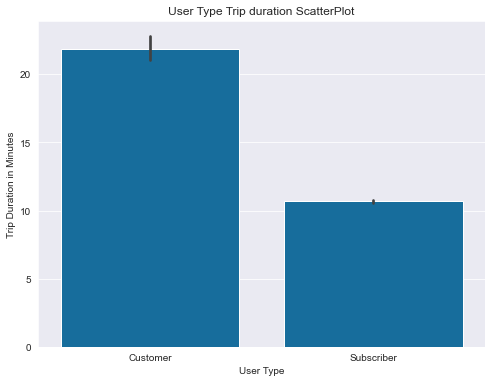

In [45]:
#Age duration scatterplot
sb.barplot(data=clean_df, x='user_type', y='duration_min', color=blu);
plt.title("User Type Trip duration ScatterPlot")
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minutes');

In [46]:
print(clean_df.query("user_type == 'Customer'").duration_min.mean())
print(clean_df.query("user_type == 'Subscriber'").duration_min.mean())

21.84844841821223
10.68046147395229


### Remarks
- The average duration for customers is higher (21.84 minutes)
- The average duration for Subscribers is (10.6 minutes)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>customers tend to take longer trips on average than Subscribers, duration of trips get shorter the older the rider, There are more Male riders than female, Men tend to take longer trips on average than women.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>Sunday and Saturday are the days with the most trips.

## Multivariate Exploration


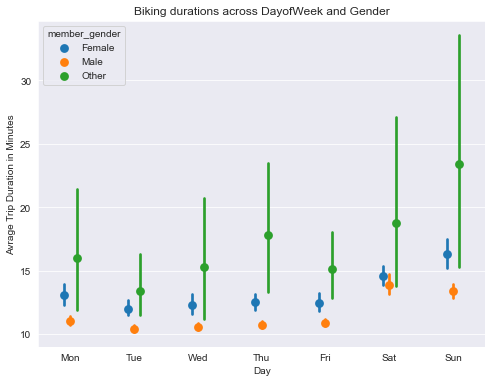

In [47]:
#How the avrage trip duration vary in each day between genders 
plt.title('Biking durations across DayofWeek and Gender')
sb.pointplot(data=clean_df, x='start_DayofWeek', y='duration_min', hue='member_gender', dodge=0.2, linestyles="");
plt.xlabel('Day');
plt.ylabel('Avrage Trip Duration in Minutes');

### Remarks 
- The male's trips are longer on average 
- both genders have an increase of trip duration on Saturday and Sunday 

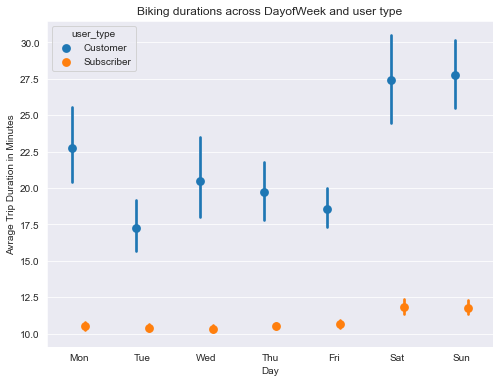

In [48]:
#How the avrage trip duration vary in each day between member type  
sb.pointplot(data=clean_df, x='start_DayofWeek', y='duration_min', hue='user_type', dodge=0.2, linestyles="");
plt.title('Biking durations across DayofWeek and user type')
plt.xlabel('Day');
plt.ylabel('Avrage Trip Duration in Minutes');

### Remarks
- The customer's trips are much longer on average 
- both user types have an increase of trip duration on Saturday and Sunday 
- Customers duration noticeably drop on Tuesday 

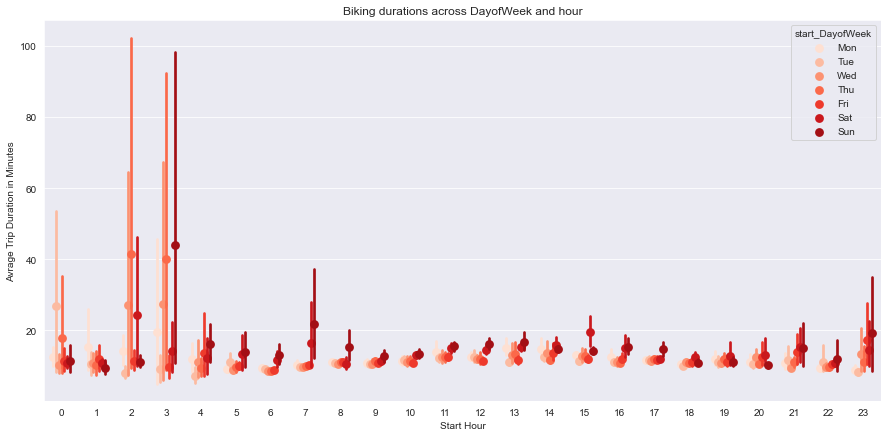

In [49]:
#How the avrage trip duration vary in each day and hour  
plt.figure(figsize=[15,7])
sb.pointplot(data = clean_df, x = 'start_hour', y = 'duration_min', hue = 'start_DayofWeek',
             dodge = 0.5, linestyles = "",palette='Reds')

plt.title('Biking durations across DayofWeek and hour')
plt.xlabel('Start Hour');
plt.ylabel('Avrage Trip Duration in Minutes');

### Remarks 
- riders on Sunday and Saturday on average have the longest trip duration
- riders on 2 AM and 3 AM on average have the longest trip duration 
- Sunday 3 AM have the longest trip average

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the relationships strengthened some of the patterns in the bivariate exploration.

### Were there any interesting or surprising interactions between features?
- customers trips are much longer on average compared to Subscribers
- males trips are longer on average compared to female trips
- rides on Sunday and Saturday on average have the longest trip duration
- rides at 2 AM and 3 AM on average have the longest trip duration 